# Imports and Settings

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data Loading

In [24]:
%%time
df = pd.read_csv("data/EDA.csv")

CPU times: user 74.3 ms, sys: 0 ns, total: 74.3 ms
Wall time: 75 ms


# Overview

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3789 non-null   object 
 1   release_year    3789 non-null   int64  
 2   original_title  0 non-null      float64
 3   genres          3789 non-null   object 
 4   duration_m      3789 non-null   int64  
 5   public_rating   3789 non-null   float64
 6   vote_count      0 non-null      float64
 7   press_rating    3789 non-null   float64
 8   audience        0 non-null      float64
 9   synopsis        3789 non-null   object 
 10  poster_link     3789 non-null   object 
 11  directors       3789 non-null   object 
 12  start1          3789 non-null   object 
 13  start2          3779 non-null   object 
 14  start3          3765 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 444.1+ KB


In [26]:
df.head()

,title,release_year,original_title,genres,duration_m,public_rating,vote_count,press_rating,audience,synopsis,poster_link,directors,start1,start2,start3
0,Titanic,1998,NaN,"Drame, Romance",194,4.0,NaN,5.0,NaN,"Southampton, 10 avril 1912. Le paquebot le plu...",https://fr.web.img6.acsta.net/c_310_420/pictur...,James Cameron,Bernard Hill,Bill Paxton,Billy Zane
1,Les convoyeurs attendent,1999,NaN,Comédie dramatique,94,3.0,NaN,4.0,NaN,Roger Closset habite un petit pavillon de la b...,https://fr.web.img2.acsta.net/c_310_420/pictur...,Benoît Mariage,Benoît Poelvoorde,Bouli Lanners,Dominique Bayens
2,Be Happy,2008,NaN,Comédie,118,3.0,NaN,4.0,NaN,"Institutrice, Poppy est une jeune femme aussi ...",https://fr.web.img5.acsta.net/c_310_420/medias...,Mike Leigh,Alexis Zegerman,Andrea Riseborough,Eddie Marsan
3,Cornouaille,2012,NaN,Drame,96,2.0,NaN,3.0,NaN,Odile est une jeune femme indépendante et rati...,https://fr.web.img6.acsta.net/c_310_420/medias...,Anne Le Ny,Aurore Clément,Catherine Vinatier,Jonathan Zaccaï
4,Le Roi Lion,1994,NaN,"Aventure, Animation, Famille, Comédie musicale",89,4.0,NaN,3.0,NaN,Sur les Hautes terres d’Afrique règne un lion ...,https://fr.web.img6.acsta.net/c_310_420/pictur...,"Roger Allers, Rob Minkoff",Dimitri Rougeul,Emmanuel Curtil,James Earl Jones


# Analysis

In [27]:
df.columns

Index(['title', 'release_year', 'original_title', 'genres', 'duration_m',
       'public_rating', 'vote_count', 'press_rating', 'audience', 'synopsis',
       'poster_link', 'directors', 'start1', 'start2', 'start3'],
      dtype='object')

In [28]:
chosen_columns = ["title", "release_year", "genres", "duration_m", "directors", "start1", "start2", "start3"]

In [29]:
df = df[chosen_columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3789 non-null   object
 1   release_year  3789 non-null   int64 
 2   genres        3789 non-null   object
 3   duration_m    3789 non-null   int64 
 4   directors     3789 non-null   object
 5   start1        3789 non-null   object
 6   start2        3779 non-null   object
 7   start3        3765 non-null   object
dtypes: int64(2), object(6)
memory usage: 236.9+ KB


# Missing Values

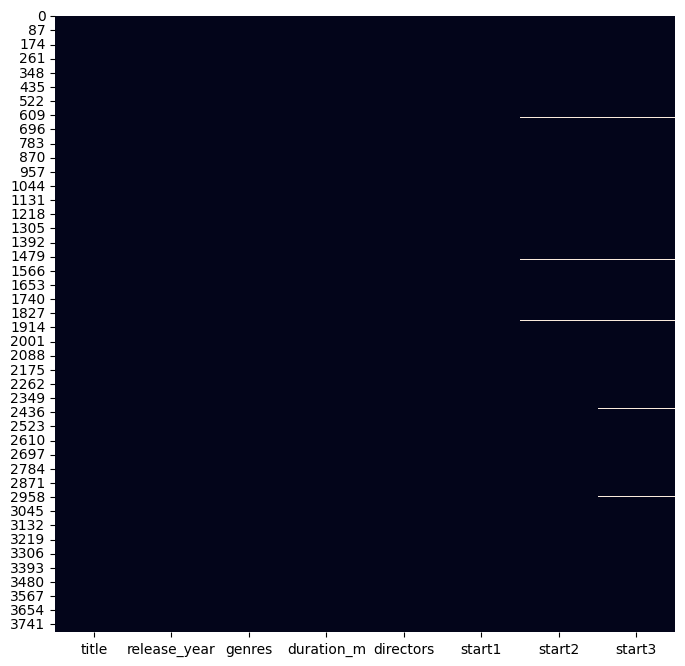

CPU times: user 690 ms, sys: 105 ms, total: 795 ms
Wall time: 633 ms


In [31]:
%%time
plt.figure(figsize=(8, 8))
sns.heatmap(df.isna(), cbar=None)
plt.show()

In [32]:
df.isna().sum()

title            0
release_year     0
genres           0
duration_m       0
directors        0
start1           0
start2          10
start3          24
dtype: int64

In [33]:
df.dropna().shape

(3765, 8)

In [34]:
df = df.dropna()

In [35]:
df.genres.str.split(",").explode().nunique()

54

In [36]:
df.genres.str.split(",").explode().unique()

array(['Drame', ' Romance', 'Comédie dramatique', 'Comédie', 'Aventure',
       ' Animation', ' Famille', ' Comédie musicale', ' Science Fiction',
       ' Aventure', 'Romance', ' Action', ' Guerre', ' Comédie',
       'Fantastique', ' Thriller', 'Thriller', ' Policier', ' Musical',
       ' Erotique', ' Biopic', ' Historique', ' Fantastique',
       'Science Fiction', ' Epouvante-horreur', 'Espionnage',
       ' Judiciaire', 'Animation', 'Action', 'Guerre',
       'Epouvante-horreur', ' Évènement Sportif', '0', 'Historique',
       ' Comédie dramatique', ' 2h 18min', ' Arts Martiaux',
       ' Espionnage', ' Western', 'Documentaire', 'Policier', ' 1h 33min',
       ' Péplum', ' 1h 42min', 'Biopic', 'Musical', ' Documentaire',
       'Western', ' 2h 23min', 'Comédie musicale', ' 1h 46min', 'Famille',
       ' 2h 33min', ' 1h 50min'], dtype=object)

In [37]:
df.query("duration_m == 0")

,title,release_year,genres,duration_m,directors,start1,start2,start3
91,"Les Razmoket à Paris, le film",2001,0,0,"Stig Bergqvist, Paul Demeyer",Cheryl Chase,Christine Cavanaugh,Cree Summer
137,K-19 : le piège des profondeurs,2002,"Drame, Action, Guerre, Thriller, 2h 18min",0,Kathryn Bigelow,Christian Camargo,Harrison Ford,Joss Ackland
325,Les Amateurs,2004,"Comédie, 1h 33min",0,Martin Valente,Barbara Cabrita,François Berléand,Jalil Lespert
577,Lost in Translation,2004,"Romance, Comédie dramatique, 1h 42min",0,Sofia Coppola,Akiko Takeshita,Akimitsu Naruyama,Anna Faris
1333,Man of Steel,2013,"Aventure, Action, Fantastique, 2h 23min",0,Zack Snyder,Amy Adams,Antje Traue,Carla Gugino
1437,Le Choc des Titans,2010,"Aventure, Action, Fantastique, Historique, 1h ...",0,Louis Leterrier,Danny Huston,Gemma Arterton,Jason Flemyng
1846,Very Bad Trip 2,2011,"Comédie, 1h 42min",0,Todd Phillips,Bradley Cooper,Ed Helms,Jeffrey Tambor
2525,Batman v Superman : L’Aube de la Justice,2016,"Aventure, Action, Fantastique, 2h 33min",0,Zack Snyder,Amy Adams,Ben Affleck,Diane Lane
2789,La Vérité si je mens ! Les débuts,2019,"Comédie, 1h 50min",0,"Michel Munz, Gérard Bitton",Anton Csaszar,Audrey Dana,François Berléand
3314,Rendez-vous Chez Les Malawas,2019,0,0,James Huth,Bass Dhem,Christian Clavier,François Levantal


In [38]:
df.query("release_year == 1998")

,title,release_year,genres,duration_m,directors,start1,start2,start3
0,Titanic,1998,"Drame, Romance",194,James Cameron,Bernard Hill,Bill Paxton,Billy Zane
9,Mary à tout prix,1998,Comédie,119,"Peter Farrelly, Bobby Farrelly",Ben Stiller,Cameron Diaz,Chris Elliott
10,Le Masque de Zorro,1998,"Romance, Aventure, Action",136,Martin Campbell,Anthony Hopkins,Antonio Banderas,Catherine Zeta-Jones
11,Il faut sauver le soldat Ryan,1998,"Drame, Guerre",163,Steven Spielberg,Adam Goldberg,Barry Pepper,Edward Burns
12,The Truman Show,1998,"Drame, Comédie",103,Peter Weir,Ed Harris,Holland Taylor,Jim Carrey
13,Alice et Martin,1998,Drame,120,André Téchiné,Alexis Loret,Carmen Maura,Jean-Pierre Lorit
14,"The X Files, le film",1998,"Fantastique, Thriller",121,Rob Bowman,Blythe Danner,David Duchovny,Gillian Anderson
15,Négociateur,1998,"Thriller, Policier",140,F. Gary Gray,David Morse,J.T. Walsh,John Spencer
17,Snake Eyes,1998,"Drame, Thriller, Policier",98,Brian De Palma,Carla Gugino,Gary Sinise,Jernard Burks
18,Fourmiz,1998,"Comédie, Aventure, Animation, Famille",83,"Eric Darnell, Tim Johnson, Lawrence Guterman",Daniel Lafourcade,Danièle Hazan,Gene Hackman
